In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from sklearn.impute import KNNImputer ,SimpleImputer
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.preprocessing import LabelEncoder , OneHotEncoder , MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier , KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
import statsmodels.api as sm
plt.style.use('fivethirtyeight')


In [2]:
df = pd.read_csv('electric-car-sales-share NEW.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 4 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Entity                               444 non-null    object 
 1   Code                                 444 non-null    object 
 2   Year                                 444 non-null    int64  
 3   Share of new cars that are electric  444 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 14.0+ KB


In [4]:
df.describe()

,Year,Share of new cars that are electric
count,444.000000,444.000000
mean,2016.297297,15.403018
std,3.610480,22.948672
min,2010.000000,0.010000
25%,2013.000000,0.600000
50%,2016.000000,3.000000
75%,2019.000000,21.000000
max,2022.000000,99.000000


In [5]:
df.describe(include= 'object')

,Entity,Code
count,444,444
unique,36,33
top,Belgium,0
freq,13,51


In [6]:
df.head()

,Entity,Code,Year,Share of new cars that are electric
0,Belgium,BEL,2010,0.01
1,China,CHN,2010,0.01
2,Europe,0,2010,14.00
3,European Union (27),0,2010,12.00
4,France,FRA,2010,85.00


In [7]:
df.tail()

,Entity,Code,Year,Share of new cars that are electric
439,Switzerland,CHE,2022,25.0
440,Turkey,TUR,2022,1.0
441,United Kingdom,GBR,2022,23.0
442,United States,USA,2022,7.7
443,World,OWID_WRL,2022,14.0


In [8]:
df.isnull().sum()

Entity                                 0
Code                                   0
Year                                   0
Share of new cars that are electric    0
dtype: int64

# to convert object to int

In [9]:
enc = LabelEncoder()

In [10]:
df['Entity']= enc.fit_transform(df['Entity'])

In [11]:
df['Code']= enc.fit_transform(df['Code'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 4 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Entity                               444 non-null    int32  
 1   Code                                 444 non-null    int32  
 2   Year                                 444 non-null    int64  
 3   Share of new cars that are electric  444 non-null    float64
dtypes: float64(1), int32(2), int64(1)
memory usage: 10.5 KB


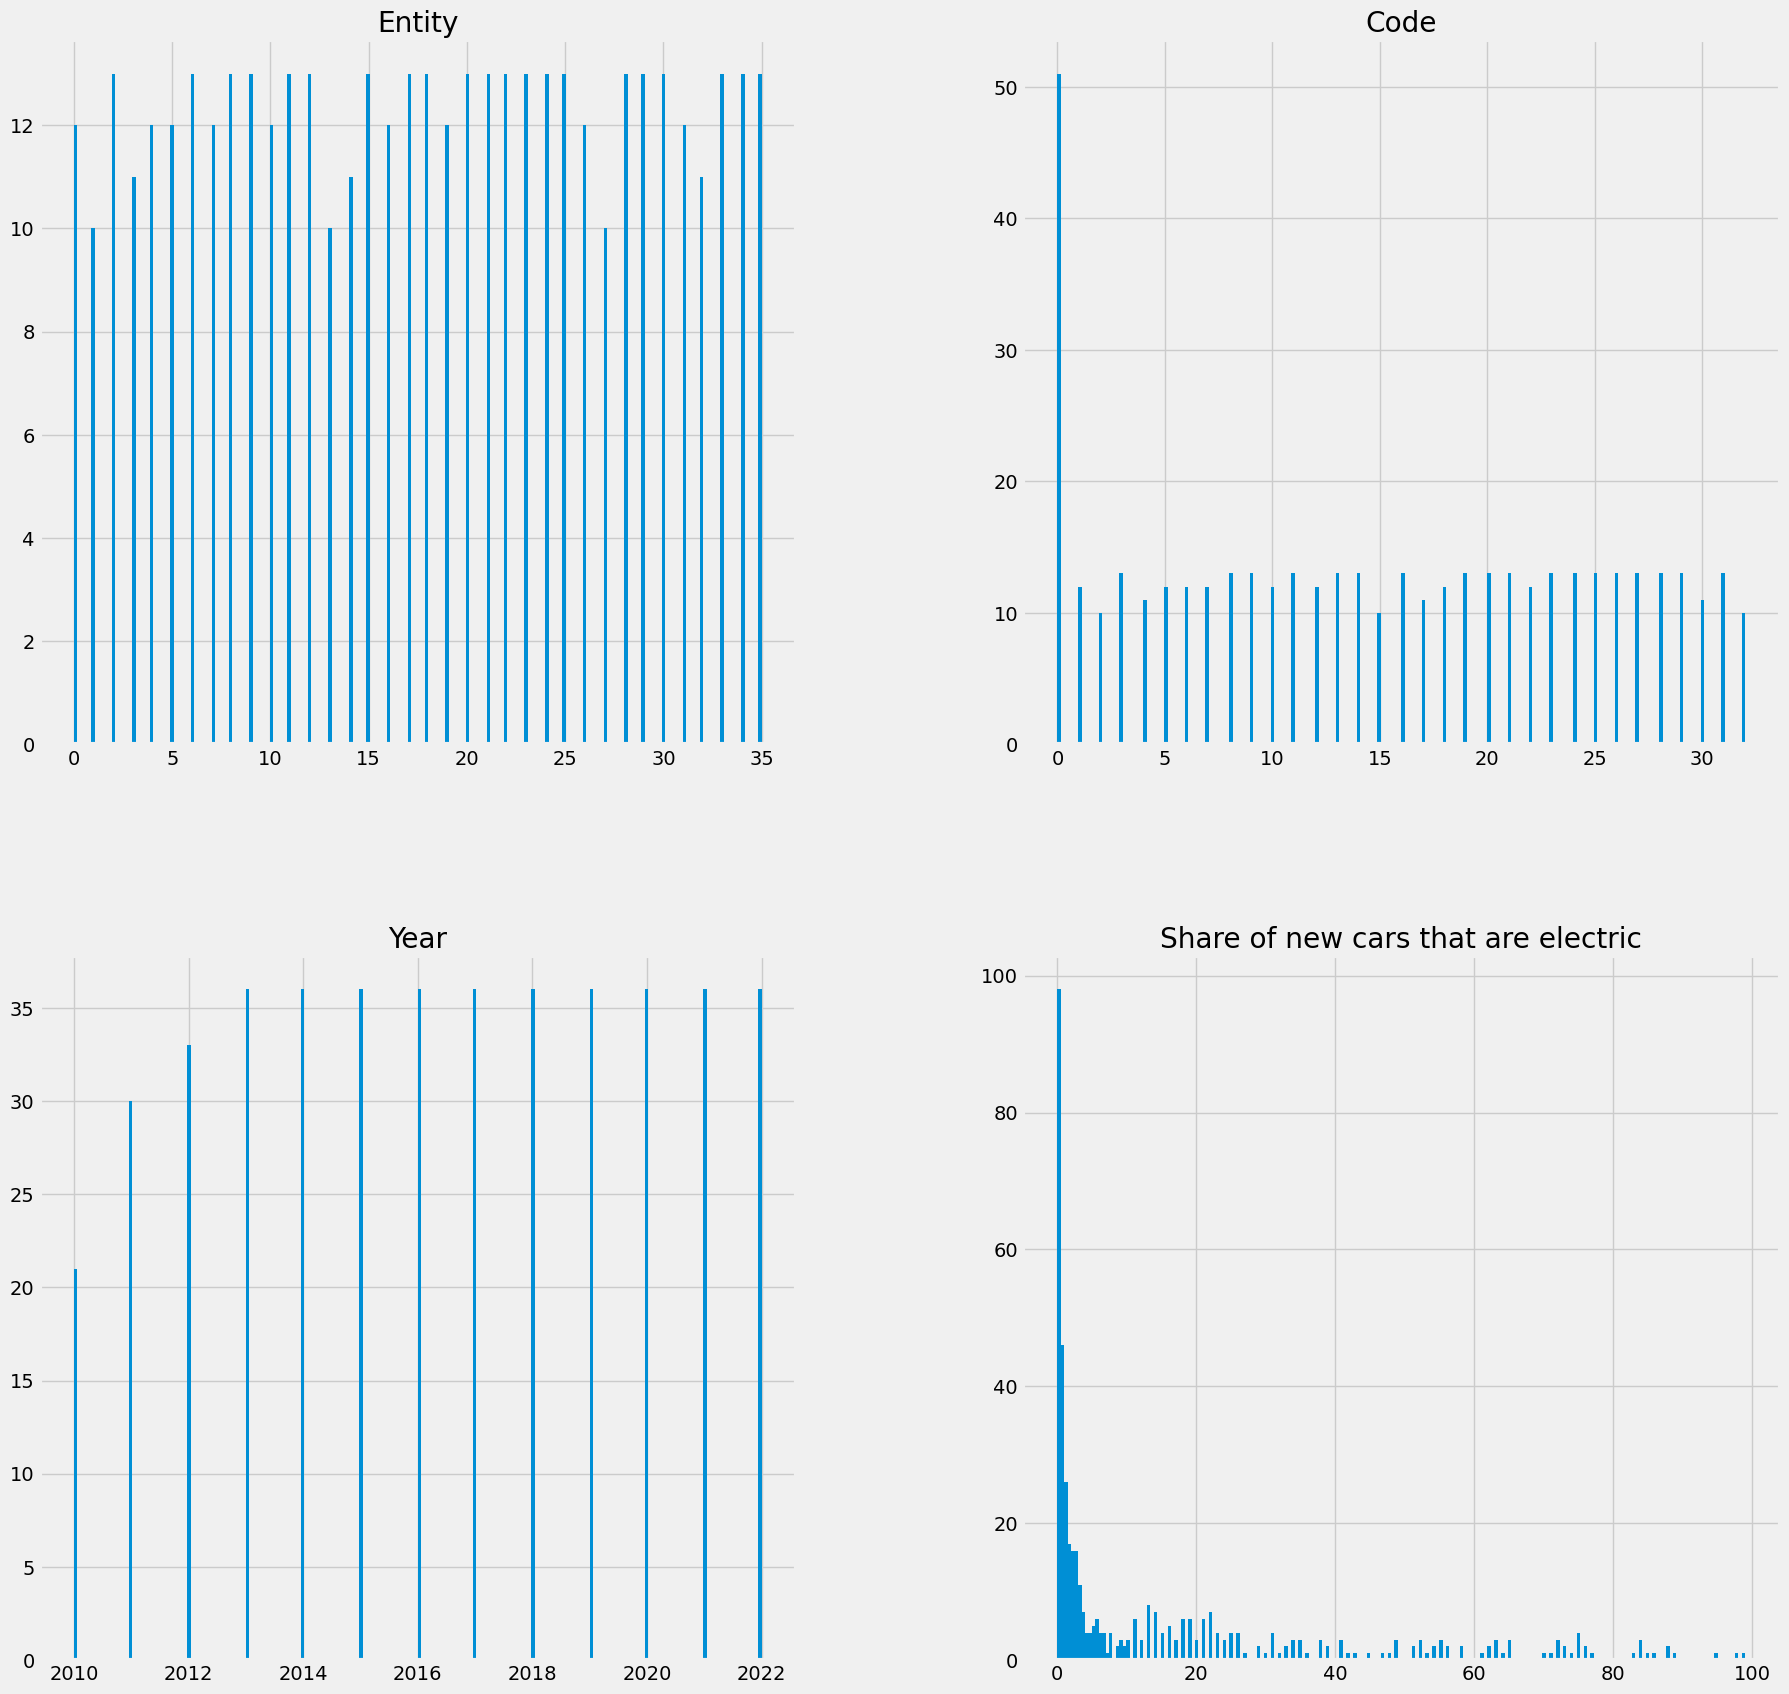

In [13]:
df.hist(bins=200,figsize=(20,20))
plt.show()

In [14]:
Mutli_impute_df = df.copy()

In [15]:
new_df = Mutli_impute_df.copy()

In [16]:

def IQR(column_name):
    Q1 = new_df[column_name].quantile(0.25)
    Q3 = new_df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    values_upper = new_df[new_df[column_name] > upper_limit]
    values_lower = new_df[new_df[column_name] < lower_limit]
    
    return values_upper, values_lower, upper_limit, lower_limit
# this function will delete any outliers upper or lower the limit
def outliers_del(column_name):
    # we will make new_df global to consider the global variable not the local
    global new_df
    new_df = new_df[new_df[column_name] < upper_limit]
    new_df = new_df[new_df[column_name] > lower_limit]
    print("the old data shape is :", df.shape)
    print("the new data shape is :", new_df.shape)
    
    
def upper(column_name):
    if values_upper.shape[0] > 0:
        print("Outliers upper than the higher limit: ")
        return new_df[new_df[column_name] > upper_limit]
    else:
        print("There are no values higher than the upper limit!")
        
        
        
def lower(column_name):
    if values_lower.shape[0] > 0:
        print("Outliers lower than the higher limit: ")
        return new_df[new_df[column_name] < lower_limit]
    else:
        print("There are no values lower than the lower limit!")
        
        
def outlier_compare(column_name):
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(25,15))
    plt.subplot(2,2,1)
    sns.boxplot(x=new_df[column_name])
    plt.subplot(2,2,2)
    sns.boxplot(x=df[column_name])
    plt.show()

    

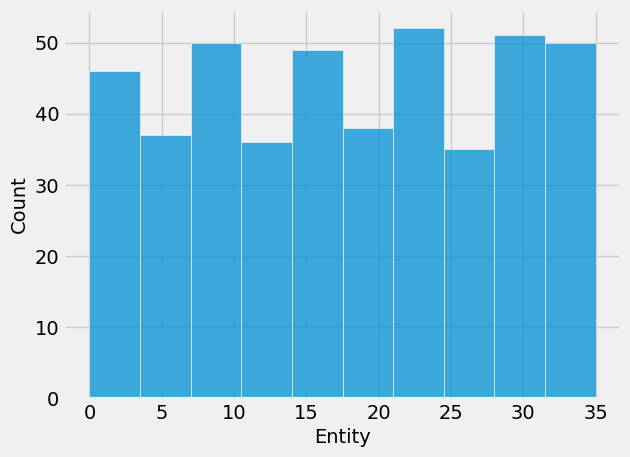

In [17]:
sns.histplot(new_df['Entity'])
plt.show()

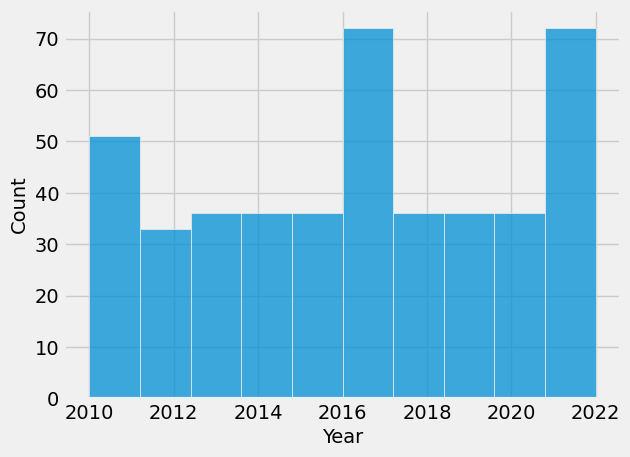

In [18]:
sns.histplot(new_df['Year'])
plt.show()

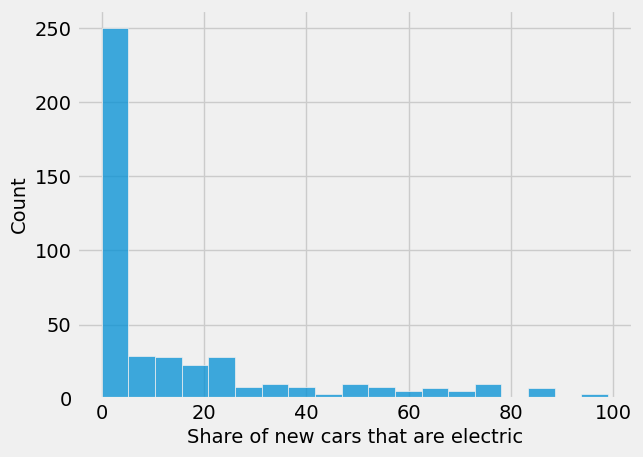

In [19]:
sns.histplot(new_df['Share of new cars that are electric'])
plt.show()

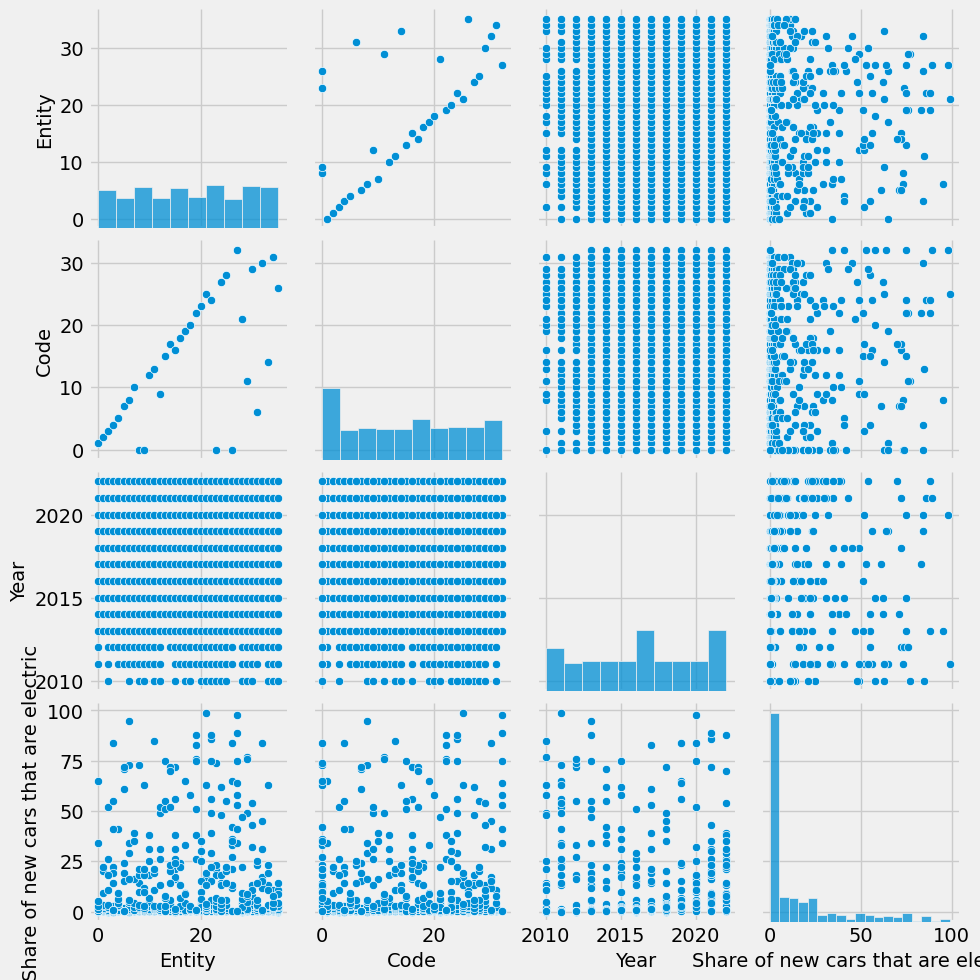

In [20]:
sns.pairplot(new_df)
plt.show()

the old data shape is : (444, 4)
the new data shape is : (241, 4)


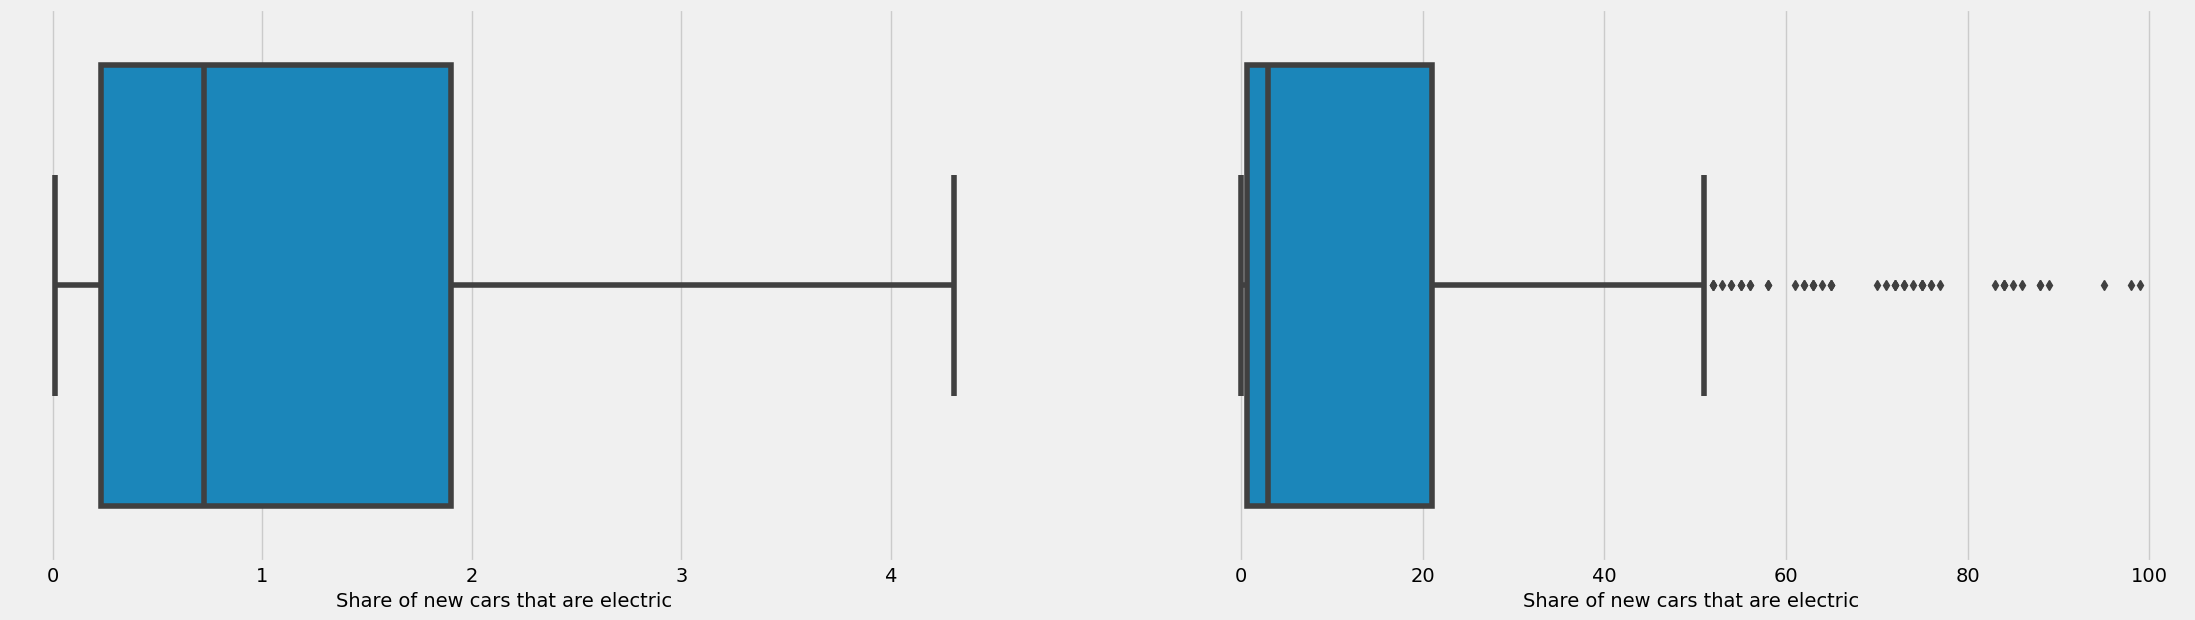

In [63]:
values_upper, values_lower, upper_limit, lower_limit = IQR('Share of new cars that are electric')
outliers_del('Share of new cars that are electric')
outlier_compare('Share of new cars that are electric')

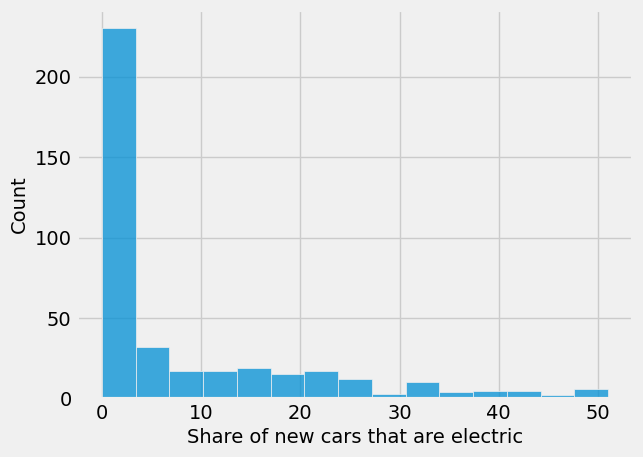

In [22]:
sns.histplot(new_df['Share of new cars that are electric'])
plt.show()

the old data shape is : (444, 4)
the new data shape is : (241, 4)


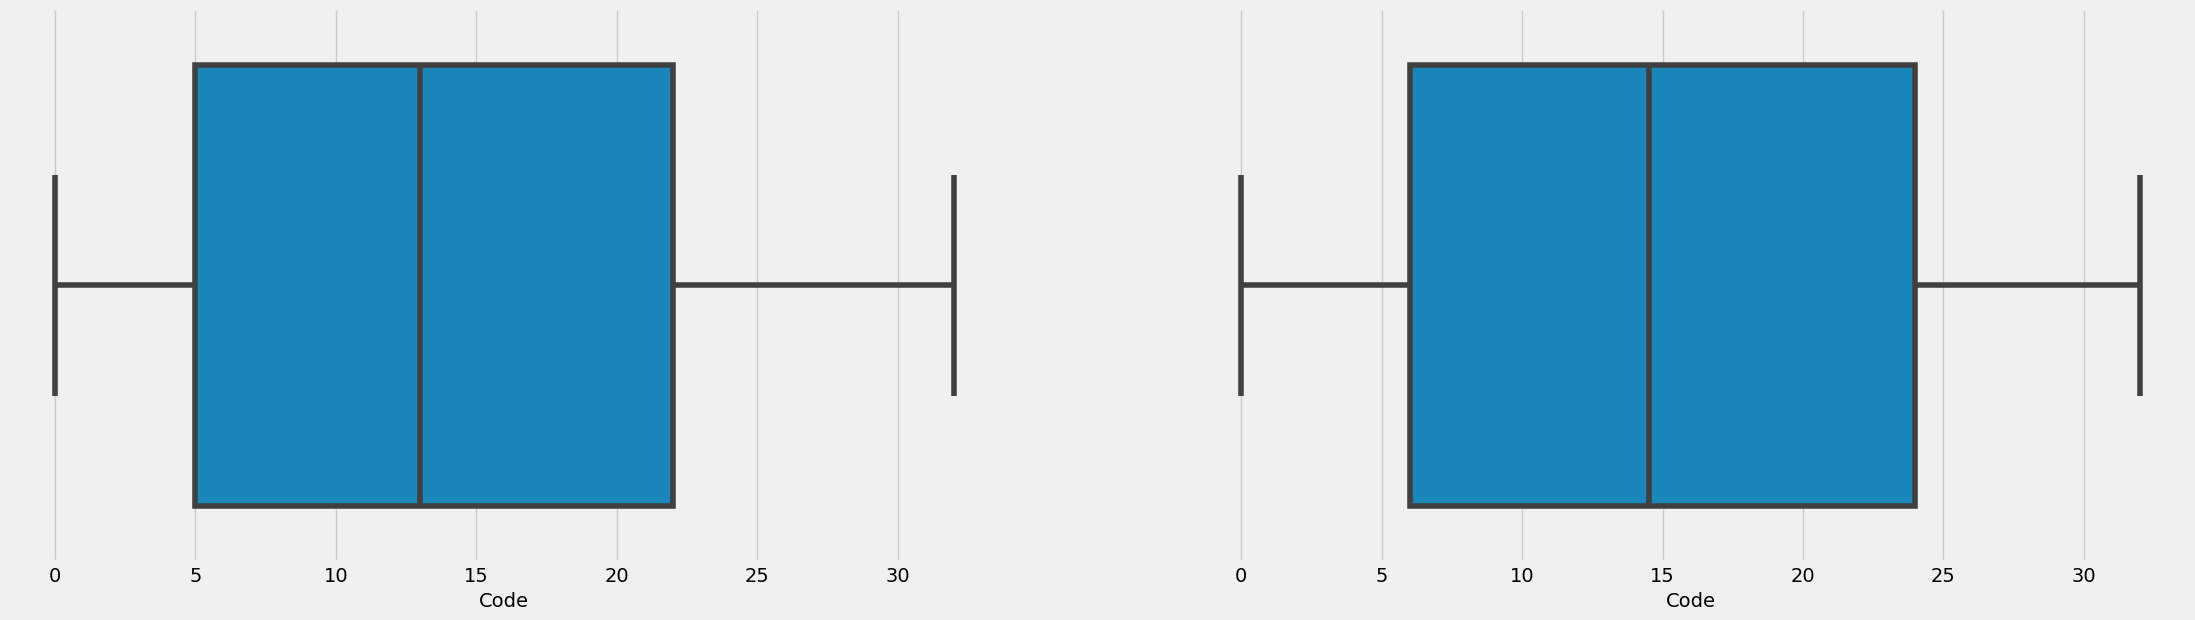

In [65]:
values_upper, values_lower, upper_limit, lower_limit = IQR('Code')
outliers_del('Code')
outlier_compare('Code')

the old data shape is : (444, 4)
the new data shape is : (241, 4)


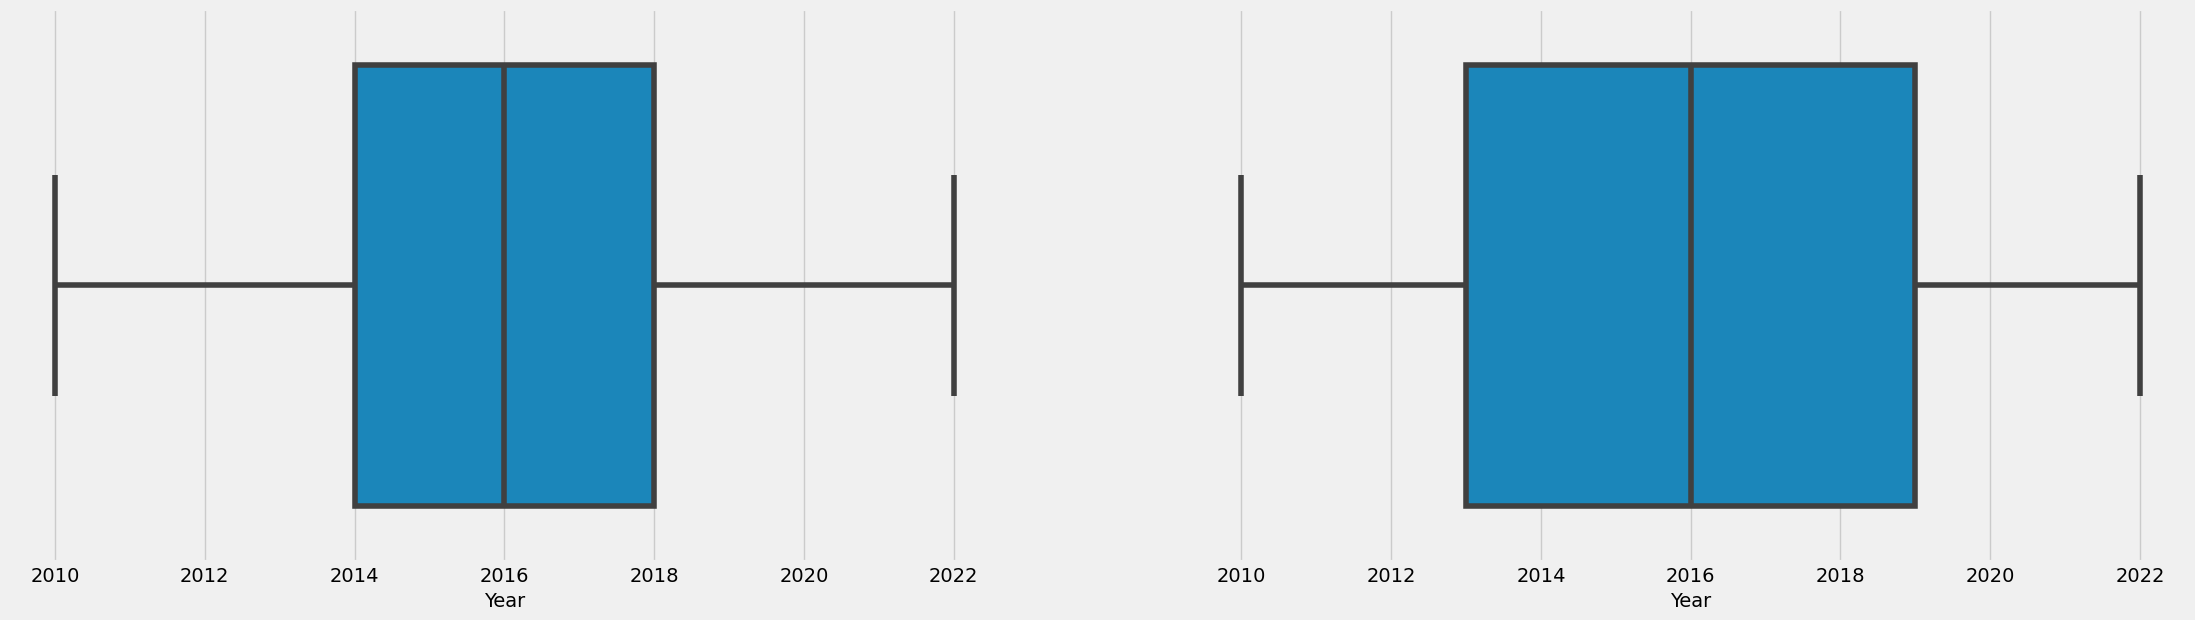

In [66]:
values_upper, values_lower, upper_limit, lower_limit = IQR('Year')
outliers_del('Year')
outlier_compare('Year')

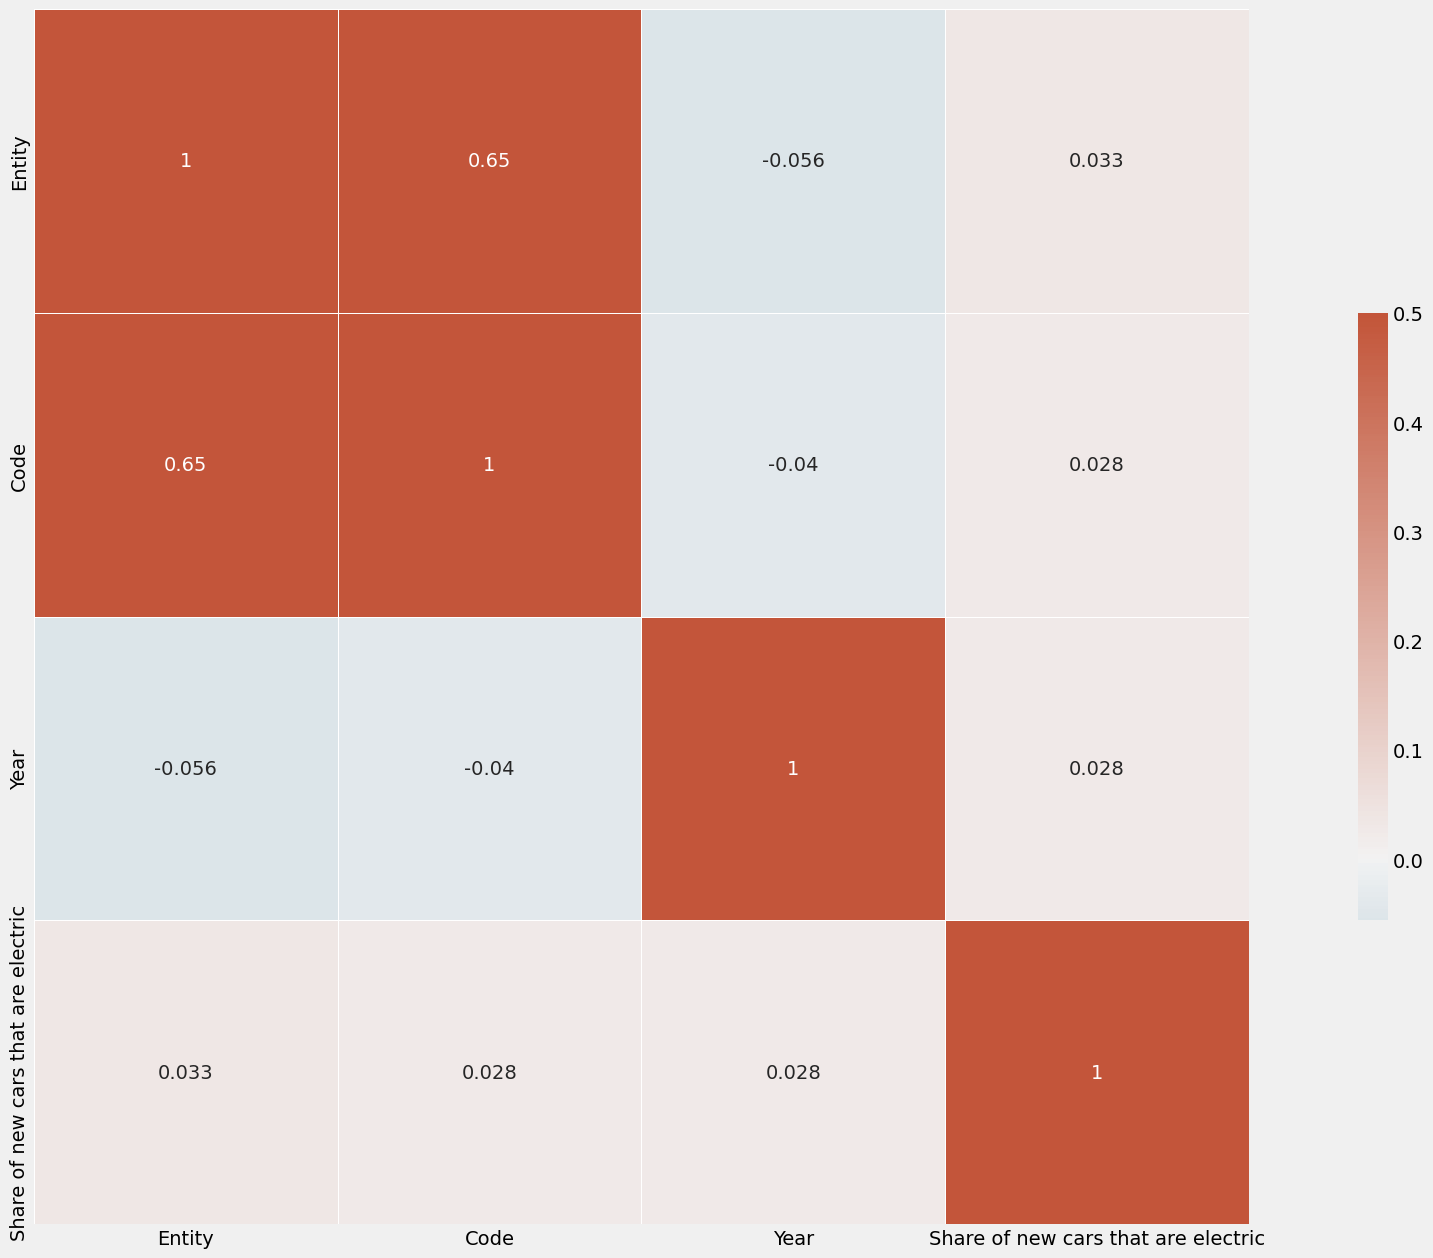

In [25]:
corr_matrix = new_df.corr()
f, ax = plt.subplots(figsize=(25, 15))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, cmap=cmap, vmax=.5, annot=True, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [26]:
df.isnull().sum()

Entity                                 0
Code                                   0
Year                                   0
Share of new cars that are electric    0
dtype: int64

In [27]:
df.fillna('missing')

,Entity,Code,Year,Share of new cars that are electric
0,2,3,2010,0.01
1,6,8,2010,0.01
2,8,0,2010,14.00
3,9,0,2010,12.00
4,11,13,2010,85.00
...,...,...,...,...
439,31,6,2022,25.00
440,32,30,2022,1.00
441,33,14,2022,23.00
442,34,31,2022,7.70


In [28]:
x = df.drop("Entity", axis=1)
y = df['Entity']

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [30]:
lr = LinearRegression()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 4 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Entity                               444 non-null    int32  
 1   Code                                 444 non-null    int32  
 2   Year                                 444 non-null    int64  
 3   Share of new cars that are electric  444 non-null    float64
dtypes: float64(1), int32(2), int64(1)
memory usage: 10.5 KB


In [32]:
lr.fit(x_train, y_train)

LinearRegression()

In [33]:
lr.score(x_train, y_train)

0.42656038857350975

In [34]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(x_train,y_train)

KNeighborsRegressor()

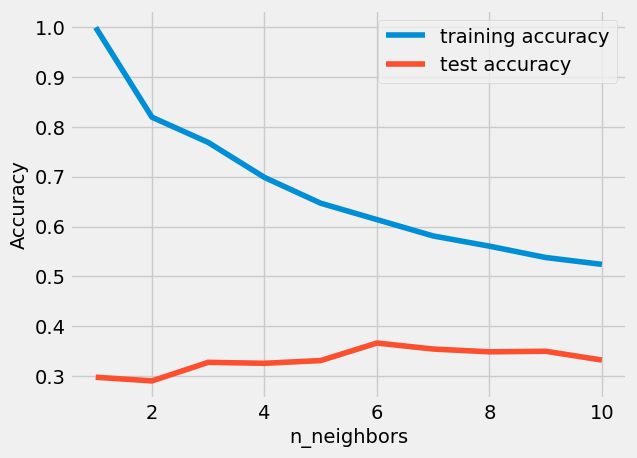

In [35]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for i in neighbors_settings:
    # build the model
    clf = KNeighborsRegressor(n_neighbors=i)
    clf.fit(x_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(x_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(x_test, y_test))
    
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

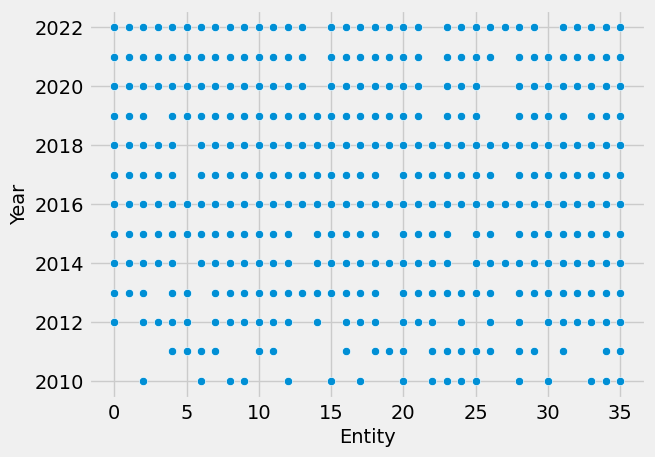

In [36]:
sns.scatterplot(x=new_df.Entity, y=new_df.Year)
plt.show()

In [37]:
normalizer = MinMaxScaler(feature_range=(0,1))
data = normalizer.fit_transform(new_df)
scaled_df = pd.DataFrame(data, columns=new_df.columns)
scaled_df.head()

,Entity,Code,Year,Share of new cars that are electric
0,0.057143,0.09375,0.0,0.000000
1,0.171429,0.25000,0.0,0.000000
2,0.228571,0.00000,0.0,0.274368
3,0.257143,0.00000,0.0,0.235144
4,0.342857,0.28125,0.0,0.960777


In [38]:
X = new_df.drop('Entity', axis=1)
y = new_df['Entity']

In [39]:
X_scaled = scaled_df.drop('Entity', axis=1)
y_scaled = scaled_df['Entity']
X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(X, y)

In [40]:
ols = LinearRegression()
ols.fit(X_scaled_train, y_scaled_train)
ols.score(X_scaled_train, y_scaled_train)

0.4527233885717691

In [41]:
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [42]:
knn.score(x_train, y_train)

0.6139216817602203

In [43]:
knn.score(x_test, y_test)

0.3659810483862801

In [44]:
y_pred = knn.predict(x_test)

In [45]:
mean_squared_error(y_test, y_pred)

67.76001001001

In [46]:
mean_absolute_error(y_test, y_pred)

6.043543543543543

In [47]:
r2_score(y_test, y_pred)

0.3659810483862801

In [48]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_scaled_train, y_scaled_train)
knn.score(X_scaled_train, y_scaled_train)

0.6403771653626226

In [49]:
knn.score(X_scaled_test, y_scaled_test)

0.3517178571428572

In [50]:
y_pred = knn.predict(X_scaled_test)

In [51]:
mean_squared_error(y_scaled_test, y_pred)

73.3410101010101

In [52]:
mean_absolute_error(y_scaled_test, y_pred)

6.3858585858585855

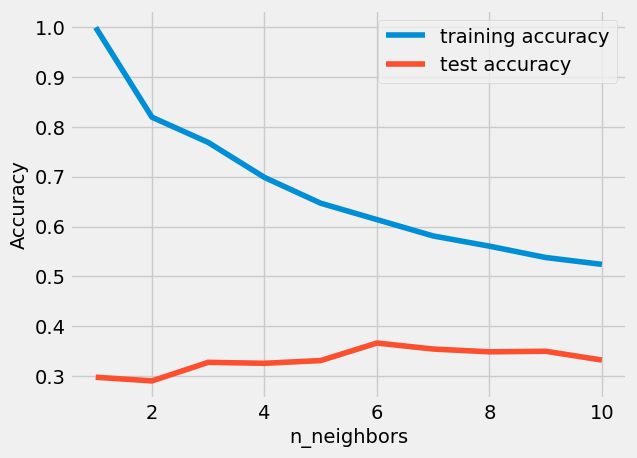

In [53]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for i in neighbors_settings:
    # build the model
    clf = KNeighborsRegressor(n_neighbors=i)
    clf.fit(x_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(x_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(x_test, y_test))
    
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [54]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Entity   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     93.20
Date:                Thu, 18 Jul 2024   Prob (F-statistic):           1.71e-45
Time:                        14:27:29   Log-Likelihood:                -1378.8
No. Observations:                 394   AIC:                             2766.
Df Residuals:                     390   BIC:                             2782.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
  
vif_data

,feature,VIF
0,Code,3.075107
1,Year,3.523901
2,Share of new cars that are electric,1.507354
